In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("heart - heart.csv")

# Exploratory Data Analysis

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Visualization of Data

<AxesSubplot:xlabel='target', ylabel='count'>

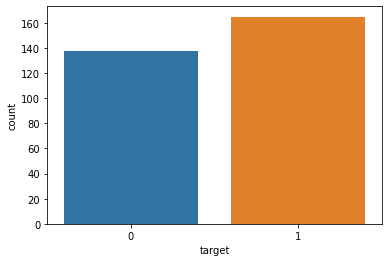

In [6]:
sns.countplot(data = df, x = 'target')

In [7]:
sns.heatmap(df.corr())

<AxesSubplot:>

In [8]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

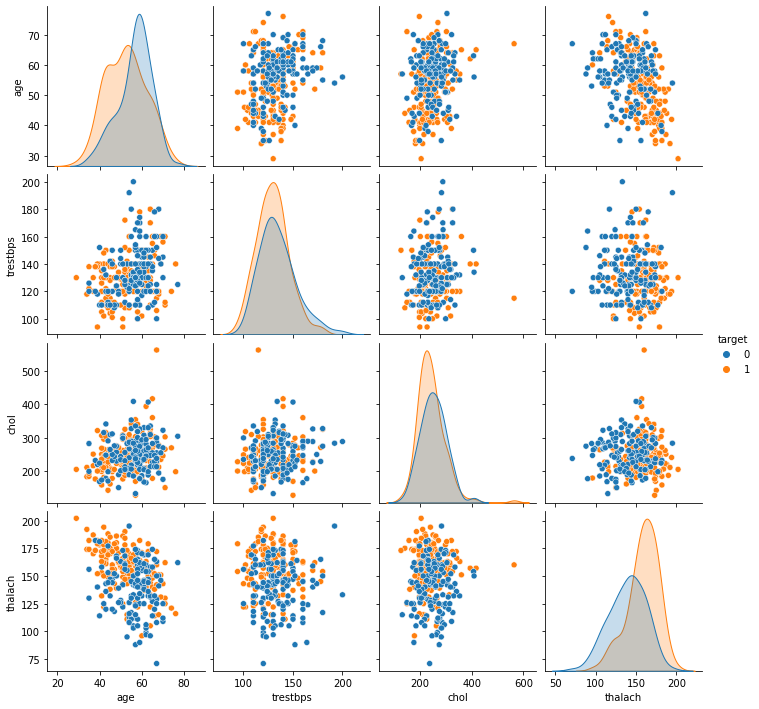

In [9]:
sns.pairplot(df,vars=['age','trestbps','chol','thalach'],hue= 'target')

# Checking Missing data/Duplicate Data

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
duplicated=df[df.duplicated()]

In [12]:
duplicated

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1

In [13]:
df=df.drop(164)

In [14]:
df.shape

(302, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# Train Test Split/Scaler

In [16]:
X = df.drop('target', axis =1)
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
log_model= LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

# Grid Search for best hypeparameter


In [24]:
penalty =['l1','l2']

In [25]:
C = np.logspace(0,4,10)

In [26]:
grid_model =GridSearchCV(log_model, param_grid={'C':C, 'penalty':penalty})

In [27]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [28]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

# Model Coefficient

In [29]:
grid_model.best_estimator_.coef_

array([[-0.06847552, -0.72572704,  0.86029631, -0.30631785, -0.13175567,
         0.04652669,  0.23462638,  0.35571972, -0.406042  , -0.6309967 ,
         0.28333726, -0.70016609, -0.56977554]])

# Visualization for Coefficient

https://rafalab.github.io/dsbook/distributions.html

In [30]:
br = pd.DataFrame(data=X.columns.values,columns=['Features'])
br['coefficients'] =grid_model.best_estimator_.coef_.reshape(13)

In [31]:
br=br.sort_values('coefficients')

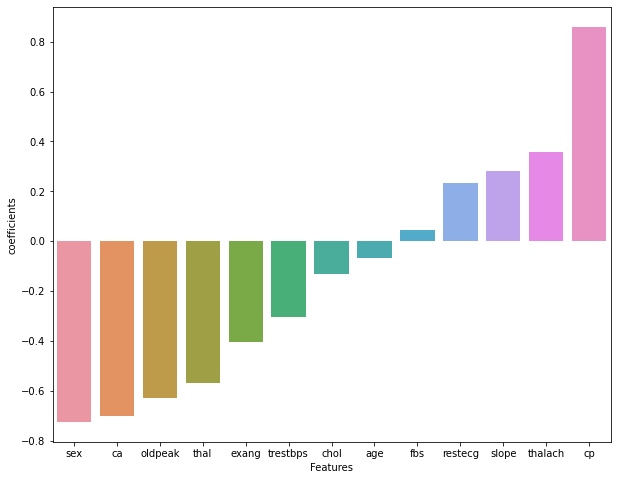

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x='Features', y='coefficients', data = br)
plt.savefig('fig4')

# Model Performance and Classification

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

In [34]:
y_pred = grid_model.predict(scaled_X_test)

In [35]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.9032258064516129

In [37]:
confusion_matrix(y_test,y_pred)

array([[12,  2],
       [ 1, 16]], dtype=int64)

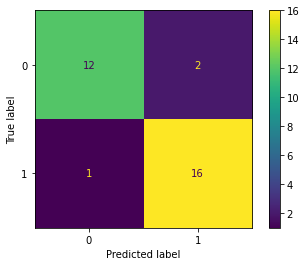

In [38]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)
plt.savefig('fig6')

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



# Performance Curve

In [40]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

In [41]:
plot_precision_recall_curve(grid_model,scaled_X_test, y_test)

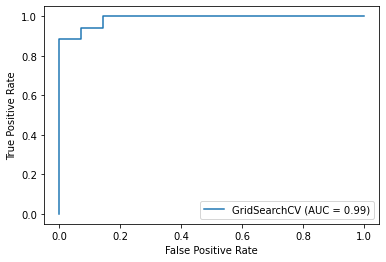

In [42]:
plot_roc_curve(grid_model,scaled_X_test, y_test)
plt.savefig('fig5')

# Model Deployment

In [43]:
#from joblib import dump , load

In [44]:
dump (scaler, 'heart_scaler.pkl')

NameError: name 'dump' is not defined

In [ ]:
dump(grid_model,'Heart_model.h5')